# Pytorch Tensor
## Tensor 생성

In [1]:
import torch

# 정수형 int64 기본형 (long)
# 실수형 float32 기본형
t1 = torch.tensor([1, 2, 3])
print(t1)
print(type(t1))
print(t1.dtype)
print(t1.shape)
print(t1.size())
print(t1.dim()) # 1차원
print(t1.device) # cpu램 적재

tensor([1, 2, 3])
<class 'torch.Tensor'>
torch.int64
torch.Size([3])
torch.Size([3])
1
cpu


In [2]:
t2 = torch.tensor([[1, 2, 3],
                  [4, 5, 6]])
print(t2)
print(type(t2))
print(t2.dtype)
print(t2.shape)
print(t2.size())
print(t2.dim())
print(t2.device)

tensor([[1, 2, 3],
        [4, 5, 6]])
<class 'torch.Tensor'>
torch.int64
torch.Size([2, 3])
torch.Size([2, 3])
2
cpu


In [3]:
# 0 또는 1로 tensor 생성
print(torch.ones(2, 3)) # 자료형 float32
print(torch.zeros(2, 3, dtype=torch.int))

x = torch.tensor([[1, 2, 3],
                  [4, 5, 6]])

print(torch.ones_like(x))
print(torch.zeros_like(x))

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0, 0, 0],
        [0, 0, 0]], dtype=torch.int32)
tensor([[1, 1, 1],
        [1, 1, 1]])
tensor([[0, 0, 0],
        [0, 0, 0]])


In [4]:
# 난수 생성
# - 정규분포
print(torch.normal(10, 1,(2,2))) # 평균, 표준편차, 크기
print(torch.randn((2,2))) # 크기
print(torch.randn_like(x.float())) # long -> float 변환 후 처리

# 균등분포
print(torch.rand(2,2)) # 0~1사이
print(torch.randint(1, 10, (2,2))) # 1이상 10 미만
print(torch.rand_like(x.float())) # 0~1 사이


# - 그외
print(torch.empty((2,3))) # 초기화되지 않은 텐서 (스레기값)

tensor([[10.1185,  7.3149],
        [10.8967, 10.7987]])
tensor([[-1.3421,  1.2461],
        [ 1.3121,  0.7346]])
tensor([[ 0.7230, -0.7994,  0.9757],
        [ 0.2167, -0.4150,  0.2930]])
tensor([[0.2082, 0.7368],
        [0.9135, 0.3854]])
tensor([[6, 1],
        [3, 7]])
tensor([[0.4231, 0.6277, 0.6705],
        [0.4945, 0.0168, 0.3974]])
tensor([[-9.9406e-32,  1.2444e-42,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00]])


In [5]:
# numpy ndarray 호환
import numpy as np

x = np.array([1, 2, 3])
print(x, type(x))

t = torch.from_numpy(x)
print(t, type(t))

x2 = t.numpy()
print(x2, type(x2))


[1 2 3] <class 'numpy.ndarray'>
tensor([1, 2, 3]) <class 'torch.Tensor'>
[1 2 3] <class 'numpy.ndarray'>


# 연산

In [6]:
a = torch.tensor([[1,2,3],
                  [4,5,6]], dtype=torch.float)

b = torch.tensor([[7,8,9],
                  [10,11,12]], dtype=torch.float)


c = torch.tensor([[1,2],
                  [3,4],
                  [5,6]], dtype=torch.float)
print(a.shape, b.shape, c.shape)

torch.Size([2, 3]) torch.Size([2, 3]) torch.Size([3, 2])


In [7]:
print(a + b)
print(a - b)
print(a * b)
print(a / b)
print(a // b)
print(a % b)

tensor([[ 8., 10., 12.],
        [14., 16., 18.]])
tensor([[-6., -6., -6.],
        [-6., -6., -6.]])
tensor([[ 7., 16., 27.],
        [40., 55., 72.]])
tensor([[0.1429, 0.2500, 0.3333],
        [0.4000, 0.4545, 0.5000]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [8]:
# broadcasting 연산
print(a + 1)
print(a + torch.tensor([10, 20, 30]))
# print(a + torch.tensor([10, 20])) # 마지막 축부터 검사 : 1 또는 숫자가 같지 않은 경우 브로드캐스팅 불가

tensor([[2., 3., 4.],
        [5., 6., 7.]])
tensor([[11., 22., 33.],
        [14., 25., 36.]])


In [9]:
# 내적 (모든 원소간의 곱을 더하기)
# 1차원 : torch.dot(), torch.matmul(), @
# 2차원이상 : torch.matmul(), @

m = torch.tensor([1, 2, 3])
n = torch.tensor([4, 5, 6])
print(m.dot(n))
print(torch.dot(m, n))
print(torch.matmul(m, n))
print(m @ n)

tensor(32)
tensor(32)
tensor(32)
tensor(32)


In [10]:
# 2차원 이상
print(a.matmul(c)) # (2,3) @ (3,2)
print(a @ c)
# print(torch.dot(a, c)) # RuntimeError: 1D tensors expected, but got 2D and 2D tensors

tensor([[22., 28.],
        [49., 64.]])
tensor([[22., 28.],
        [49., 64.]])


## 통계연산
축을 지정해서 연산하는 sum, mean, max, min 등

In [11]:
# 합계
"""
[[[1, 2, 3],
  [4, 5, 6]]]
"""

print(torch.sum(a, dim=0))
print(torch.sum(a, dim=1))
print(torch.sum(a, dim=None))

# 평균
print(torch.mean(a, dim=0))
print(torch.mean(a, dim=1))
print(torch.mean(a, dim=None))


tensor([5., 7., 9.])
tensor([ 6., 15.])
tensor(21.)
tensor([2.5000, 3.5000, 4.5000])
tensor([2., 5.])
tensor(3.5000)


## 형변환
astype 대신 해당 자료형 메소드 호출

In [12]:
x = torch.tensor([1,2,3])
print(x, x.dtype)

print(x.float(), x.float().dtype)
print(x.double(), x.double().dtype)
print(x.int(), x.int().dtype)
print(x.long(), x.long().dtype)

tensor([1, 2, 3]) torch.int64
tensor([1., 2., 3.]) torch.float32
tensor([1., 2., 3.], dtype=torch.float64) torch.float64
tensor([1, 2, 3], dtype=torch.int32) torch.int32
tensor([1, 2, 3]) torch.int64


# 형태변경

In [13]:
t = torch.arange(12) # start, stop step
t_ = t.reshape(3, 4)
t_ - t.reshape(3, -1)
t_ = t.reshape(-1, 4)
t_ = t.reshape(2,2,3)

print(t_, '\n', t_.size())

tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]]]) 
 torch.Size([2, 2, 3])


In [14]:
# 잔차
t = torch.arange(12).reshape(3, 4) # 0번째랑 1번째 바꾸라
print(t.T, '\n', t.T.shape)
print(t.transpose(0,1), '\n', t.transpose(0,1).shape)

tensor([[ 0,  4,  8],
        [ 1,  5,  9],
        [ 2,  6, 10],
        [ 3,  7, 11]]) 
 torch.Size([4, 3])
tensor([[ 0,  4,  8],
        [ 1,  5,  9],
        [ 2,  6, 10],
        [ 3,  7, 11]]) 
 torch.Size([4, 3])


In [15]:
# 평탄화
print(t.flatten())
print(t.reshape(-1))

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])


In [16]:
# 차원 축소 squeeze()
x = torch.tensor([[1,2], [3,4]])
print(x.size())

print(x.squeeze(0), x.squeeze(0).shape)

torch.Size([2, 2])
tensor([[1, 2],
        [3, 4]]) torch.Size([2, 2])


In [17]:
# 차원 추가 unsqueeze()
x = torch.tensor([[1,2], [3,4]])
print(x.size())

x = x.unsqueeze(0)
x_ = x.unsqueeze(-1)
print(x_.size())
print(x_)

torch.Size([2, 2])
torch.Size([1, 2, 2, 1])
tensor([[[[1],
          [2]],

         [[3],
          [4]]]])


## indexing | slicing

In [18]:
x = torch.arange(1, 13).reshape(3, 2, 2)
x


tensor([[[ 1,  2],
         [ 3,  4]],

        [[ 5,  6],
         [ 7,  8]],

        [[ 9, 10],
         [11, 12]]])

In [19]:
x[0]
# x[1][0]
x[1, 0]
x[2, 1]
x[-1, -1]

x[-1, -2, -1]
x[-1, 0, -1]


tensor(10)

In [20]:
# slicing
x_ = x[:, 0] # 인덱싱을 사용한 1차원 제거
x_ = x[:, :1] # 슬라이싱은 차원 유지
print(x_)
print(x_.shape)

tensor([[[ 1,  2]],

        [[ 5,  6]],

        [[ 9, 10]]])
torch.Size([3, 1, 2])


In [21]:
#fancy indexing
index = [1,2]
x[index]
print(x_.shape)
print(x_)

torch.Size([3, 1, 2])
tensor([[[ 1,  2]],

        [[ 5,  6]],

        [[ 9, 10]]])


## 유용한 메소드

In [22]:
# split
# - 지정한 개수로 분할, 마지막은 지정한 개수보다 작을 수 있다.
x = torch.zeros(10, 4)
x_splits = torch.split(x, 4)
x_splits

(tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
 tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
 tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.]]))

In [23]:
# expand : 해당 차원의 데이터를 반복 확장
k = torch.tensor([[[1, 2]],
                  [[3, 4]]])
print(k.shape)

k_exp = k.expand(2, 3, 2)
print(k_exp)
print(k_exp.shape)


torch.Size([2, 1, 2])
tensor([[[1, 2],
         [1, 2],
         [1, 2]],

        [[3, 4],
         [3, 4],
         [3, 4]]])
torch.Size([2, 3, 2])


In [24]:
# 원본 배열 k의 view 형태로 k_exp가 생성된 것이다.
# k_exp가 k를 참조, k_exp를 변경하면 원본 배열로 변경된다.
k_exp[0,0,0] = 100
print(k_exp)
print(x)

tensor([[[100,   2],
         [100,   2],
         [100,   2]],

        [[  3,   4],
         [  3,   4],
         [  3,   4]]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


In [25]:
# repeat : 원본 배열의 view 생성 없이 실제 값 복사
k = torch.tensor([[[1, 2]],
                   [[3, 4]]])
print(k.shape)

k_rep = k.repeat(1, 3, 1)
print(k_rep)
print(k_rep.shape)

k_rep[0, 0, 0] = 100
print(k_rep)
print(k)

torch.Size([2, 1, 2])
tensor([[[1, 2],
         [1, 2],
         [1, 2]],

        [[3, 4],
         [3, 4],
         [3, 4]]])
torch.Size([2, 3, 2])
tensor([[[100,   2],
         [  1,   2],
         [  1,   2]],

        [[  3,   4],
         [  3,   4],
         [  3,   4]]])
tensor([[[1, 2]],

        [[3, 4]]])


In [26]:
# masked_fill : mask 조건 식에ㅣ true인 경으네는 값 복사
x = torch.arange(9).reshape(3, -1)
print(x)

mask = x > 4
print(mask)


x_ = x.masked_fill(mask, value=0) # True인 위치를 0으로 채우기
print(x_)

x[mask] # True인 위치의 값

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
tensor([[False, False, False],
        [False, False,  True],
        [ True,  True,  True]])
tensor([[0, 1, 2],
        [3, 4, 0],
        [0, 0, 0]])


tensor([5, 6, 7, 8])

## 모델 학습에서 tensor 다차원 배열 연산

In [27]:
import torch.nn as nn
# 단층 선형 연산
X = torch.randn(4, 5) # 입력
W = torch.randn(5, 3) # Linear Layer 기준(3개의 노드)
b = torch.randn(1, 3)

# Linear 기준
z = torch.matmul(X, W) + b

# 활성화함수 relu
# output = nn.ReLR()(z)

relu = nn.ReLU()
output = relu(z)
output

tensor([[6.1333, 0.0000, 0.3794],
        [3.2522, 0.0000, 0.3610],
        [3.0291, 0.0000, 0.0232],
        [0.5743, 0.0000, 0.0000]])

In [28]:
# Linear layer 클래스 사용
class SimpleNet(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.layer = nn.Linear(input_dim, output_dim)
        # 선형층 W(input_dim, output_dim)
        # 선형층 b(1, output-dim)
        self.relu = nn.ReLU()


    def forward(self, x):
        z = self.layer(x)
        output = self.relu(z)
        return output


model = SimpleNet(input_dim=5, output_dim=3)
output = model(X)
print(output)

tensor([[0.0000, 0.1825, 0.0000],
        [0.0000, 0.0000, 0.2386],
        [0.1067, 0.0000, 0.3027],
        [0.0000, 0.0000, 0.1295]], grad_fn=<ReluBackward0>)


## 실습문제
### 💡 조건


* 입력: 샘플 수 6개, 특성 수 10개
* 은닉층: 입력 10 → 출력 8 (활성화 함수: `tanh`)
* 출력층: 입력 8 → 출력 4 (활성화 함수: `softmax`)
* PyTorch 사용






### 문제 1. 직접 가중치/절편을 선언하고 순전파 계산


다음 조건에 맞게 PyTorch 텐서를 사용하여 forward 계산을 수동으로 구현하세요.


**요구사항**


1. 입력 `X`는 `torch.randn(6, 10)` 으로 생성한다.
2. `W1`, `b1`, `W2`, `b2`도 torch의 `randn`을 이용해 직접 정의한다.
3. 은닉층에서는 `tanh`, 출력층에서는 `softmax`를 사용한다.
4. 최종 결과는 `(6, 4)` 크기의 확률 벡터이어야 한다.


### 문제 2. 위 네트워크를 PyTorch 모델 클래스로 작성


다음 조건에 맞는 `nn.Module` 클래스를 작성하세요.


**요구사항**


1. `__init__`에 `nn.Linear(10, 8)`과 `nn.Linear(8, 4)`를 정의한다.
2. `forward`에서는 `tanh` → `softmax` 순으로 활성화 함수를 적용한다.
3. 임의의 입력 `X = torch.randn(6, 10)`을 모델에 넣어 출력 결과를 확인한다.






### 문제3. 층별 가중치/편향 출력


모델 내 가중치와 편향 값을 확인하고 출력하세요.


In [30]:
# 문제 1. 직접 가중치/ 절편을 선언하고 순전파 계산
import torch.nn as nn

X = torch.randn(6, 10)

# 은닉층 (10, 8) : 8개의 뉴런 (노드)

W1 = torch.randn(10, 8) # 10행 8열의 값이 필요함 기울기 80개
b1 = torch.randn(1, 8) # 노드마다 생기니까 8개

# 은닉층 계산
z1 = X @ W1 + b1
tanh = torch.tanh(z1)
print(z1.shape)



# 출력층 (8, 4): 4개의 뉴런 (노드)
W2 = torch.randn(8, 4)
b2 = torch.randn(1, 4)


# 출력층 계산
z2 = z1 @ W2 + b2
softmax = torch.softmax(z2,  dim=1)
print(z2.shape)

# 최종 출력
print(torch.sum(z2, dim=1)) # 각 데이터 샘플별 합은 1
print(z2) # 열고정하면 행별로 계산된다
print(torch.argmax(z2, dim=1))


torch.Size([6, 8])
torch.Size([6, 4])
tensor([ 22.2583,  -2.9502,   0.1228,  25.1242, -22.4451,  13.6019])
tensor([[  6.1109,  -3.0795,  -2.8435,  22.0704],
        [ -2.7414,  -2.7877,  -6.0553,   8.6343],
        [ -8.9079,   6.1086,   1.9079,   1.0143],
        [ -9.0094,  28.1608,   7.4439,  -1.4710],
        [  7.6100, -14.5850,  -6.3378,  -9.1323],
        [ -7.0670,  -3.5656,  11.0493,  13.1851]])
tensor([3, 3, 1, 1, 0, 3])


In [31]:
# 문제 2.위 네트워크를 PyTorch 모델 클래스로 작성
class Net(nn.Module):

    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(10, 8)
        self.output = nn.Linear(8, 4)
        self.tanh = nn.Tanh()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, X):
        z1 = self.hidden(X)
        output = self.tanh(z1)
        z2 = self.output(output)
        output = self.softmax(z2)
        return output



model = Net()
output = model(X)
print(output)
output.size()



# 자동 미분 계산 그래프에서 분리 후 변환
print(output.detach().numpy())


tensor([[0.2871, 0.1641, 0.1033, 0.4455],
        [0.1783, 0.2950, 0.2152, 0.3115],
        [0.2378, 0.1784, 0.1008, 0.4829],
        [0.1178, 0.3689, 0.3380, 0.1753],
        [0.2369, 0.1954, 0.1588, 0.4089],
        [0.1907, 0.2510, 0.1309, 0.4273]], grad_fn=<SoftmaxBackward0>)
[[0.2871092  0.16407885 0.10334925 0.4454627 ]
 [0.17834915 0.29503882 0.21515042 0.31146166]
 [0.23781498 0.17844433 0.10079088 0.48294985]
 [0.11780357 0.3689354  0.338      0.17526104]
 [0.23693743 0.19536656 0.1588353  0.40886065]
 [0.19074488 0.2510038  0.13094853 0.42730278]]


In [122]:
# 문제 3. 층별 가중치/ 편향 출력




# columns = ['W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8', 'W9', 'W10', 'b']
# index = ['Node1', 'Node2', 'Node3', 'Node4', 'Node5', 'Node6', 'Node7', 'Node8']

for name, param in model.state_dict().items():
    print(f'{name}: \n {param}\n')

hidden.weight: 
 tensor([[-0.0865,  0.1691,  0.3098,  0.2993,  0.1919,  0.1887,  0.1991,  0.0534,
         -0.1245, -0.0577],
        [-0.2382, -0.1914, -0.1108, -0.1181,  0.0389, -0.2545,  0.2042,  0.2313,
         -0.3021,  0.0154],
        [ 0.1997, -0.0750, -0.2673, -0.3010,  0.1886,  0.0874, -0.1801, -0.2408,
         -0.0112, -0.0623],
        [ 0.3083, -0.2504, -0.2146, -0.1744, -0.1542,  0.0202,  0.2260,  0.1720,
          0.2125,  0.0022],
        [ 0.2562, -0.0078,  0.2266,  0.2499, -0.1987, -0.2144, -0.2156,  0.1169,
          0.2139, -0.1603],
        [-0.0637,  0.2561, -0.0339,  0.1362, -0.1996,  0.2632, -0.3014,  0.1088,
         -0.2712, -0.0831],
        [-0.2907,  0.2894, -0.1307, -0.1926,  0.2027,  0.0746, -0.2591, -0.0150,
          0.1659,  0.2220],
        [-0.1543,  0.2250, -0.2719, -0.0575,  0.2672, -0.1195, -0.2904,  0.2887,
         -0.1103, -0.1787]])

hidden.bias: 
 tensor([-0.0591, -0.2171,  0.1088,  0.3134, -0.2488,  0.2969,  0.0160, -0.0687])

output.weigh

## 이미지 데이터 처리
- 컬러 이미지 한장(pytorch기준): (채널, 높이, 너비)
- 컬러 이미지 한장(matplotlib): (높이, 너비, 채널)
- 컬러 이미지 여러장(pytorch) : (batch, 채널, 높이, 너비)

In [38]:
# 3차원 데이터(C, H, W)의 mean연산
# - axis=0, Channel 축을 따라 평균(H, W)
# - axis=1, Height 축을 따라 평균(C, W)
# - axis=2, Width 축을 따라 평균(C, H)


x = np.arange(1, 25).reshape(2, 3, 4)
print('axis=0', x.mean(axis=0).shape)
print('axis=1', x.mean(axis=1).shape)
print('axis=2', x.mean(axis=2).shape)

x.mean(axis=1)


axis=0 (3, 4)
axis=1 (2, 4)
axis=2 (2, 3)


array([[ 5.,  6.,  7.,  8.],
       [17., 18., 19., 20.]])

(3, 32, 32)
(32, 32)


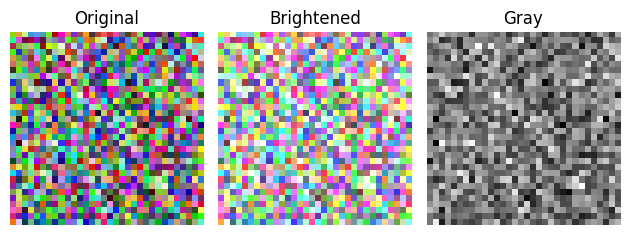

In [60]:
from matplotlib import pyplot as plt

# 이미지 한장 시각화
channels = 3 # rgb
height = 32
width = 32

# torch 이미지 순서
image = np.random.rand(channels, height, width)

# np.clip(arr, min, max) : arr요소 중에 min보다 작은값은 min으로, max보다 큰 값은 max로 클리핑
bright_image = np.clip(image + 0.2, 0, 1)
print(bright_image.shape)

gray_image = np.mean(image, axis=0)
print(gray_image.shape)

# 이미지 출력을 위한 변환
# (C, H, W) -> (H, W, C)
# ndarray.transpose(*axes) : 원하는 축의 인덱스를 작성
image_trans = image.transpose(1, 2, 0)
bright_image_trans = bright_image.transpose(1, 2, 0)

# 이미지 시각화
# plt.subplot(nrows, ncols, index)
# - index 1부터 시작
# - nrowncolsindex 숫자조합
plt.subplot(1, 3, 1) # 131
plt.imshow(image_trans)
plt.title('Original')
plt.axis('off')

plt.subplot(132)
plt.imshow(bright_image_trans)
plt.title('Brightened')
plt.axis('off')

plt.subplot(133)
plt.imshow(gray_image, cmap='gray')
plt.title('Gray')
plt.axis('off')

plt.tight_layout()
plt.show()

(5, 3, 32, 32)
(5, 32, 32, 3)
(5, 32, 32, 3)
(5, 32, 32, 3)
(5, 32, 32)


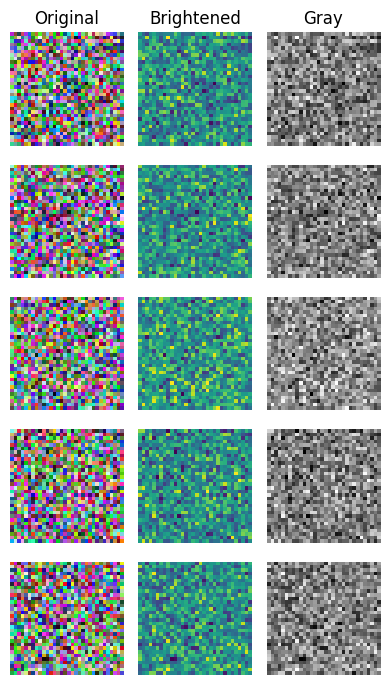

In [63]:
# 이미지 여러장

# 이미지 여러장

batch = 5 # 5장의 사진
channels = 3
height = 32
width = 32

images = np.random.rand(batch, channels, height, width)
print(images.shape)

# 이미지 시각화를 위한 채널차원 변경
# (B, C, H, W) -> (B, H, W, C)
images = images.transpose(0, 2, 3, 1) # (5, 32, 32, 3)
print(images.shape)

bright_image = np.clip(images + 0.2, 0, 1)
print(bright_image.shape)

gray_images = images.mean(axis=3)
print(bright_image.shape)

gray_images = images.mean(axis=3)
print(gray_images.shape)

# 이미지 시각화
plt.figure(figsize=(4, 7))
for i in range(batch) :
    # i == 0 1 2 3 4
    plt.subplot(batch, 3, i * 3 + 1)
    plt.imshow(images[i])
    if i == 0 : plt.title('Original')
    plt.axis('off')

    plt.subplot(batch, 3, i * 3 + 2)
    plt.imshow(gray_images[i])
    if i == 0 : plt.title('Brightened')
    plt.axis('off')

    plt.subplot(batch, 3, i * 3 + 3)
    plt.imshow(gray_images[i], cmap='gray')
    if i == 0 : plt.title('Gray')
    plt.axis('off')

plt.tight_layout()
plt.show()




